In [155]:
using Plots

c = -15
F(y) = y^2
f(y) = c * y + F(y)

function euler!(y, f, i, dt)
    dy = f(y[i-1]) * dt
    y[i] = y[i-1] + dy
end

euler! (generic function with 1 method)

In [156]:
y0 = 2.
M = 20
dt = .15
y = Vector{Float64}(undef, M)
y[1] = y0
t = collect(0:(M-1)) * dt

for i in 2:M 
    euler!(y, f, i, dt)
end


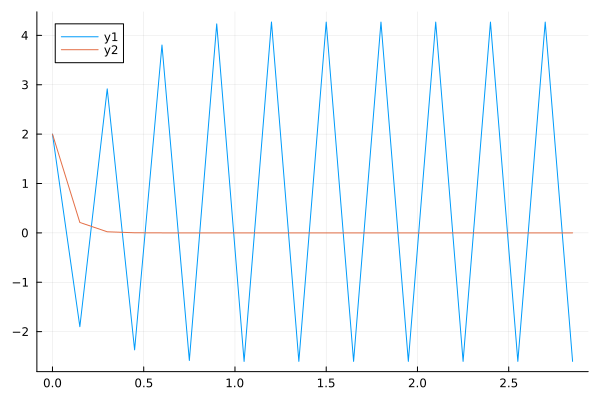

In [157]:
plot(t, y)
plot!(t, y0*exp.(c.*t))

In [158]:
function etd1!(y, i, dt)
    yn = y[i-1]
    Fn = F(yn)
    k1 = exp(c*dt)
    k2 = (k1 - 1.) / c
    y[i] = k1 * yn + k2 * Fn
end

etd1! (generic function with 1 method)

In [159]:
function etd2rk!(y, i, dt)
    yn = y[i-1]
    Fn = F(yn)
    k1 = exp(c*dt)
    k2 = dt * ( exp(c*dt) - 1 ) / (c * dt)
    k3 = dt * ( exp(c*dt) - (1 + c*dt) ) / (c * dt)^2
    an = k1 * yn + k2 * Fn
    y[i] = an + k3*(F(an) - Fn)
end

etd2rk! (generic function with 1 method)

In [160]:
y0 = 5.
M = 5
M2 = 1000
dt = .17
print(c*dt)
dt2 = dt * (M-1) / (M2 - 1)

t = collect(0:(M-1)) * dt
te = collect(0:(M2-1)) * dt2

y1 = Vector{Float64}(undef, M)
y2 = Vector{Float64}(undef, M)
y3 = Vector{Float64}(undef, M)
ye = Vector{Float64}(undef, M2)
y1[1] = y0
y2[1] = y0
y3[1] = y0
ye[1] = y0

for i in 2:M 
    euler!(y1, f, i, dt)
    etd1!(y2, i, dt)
    etd2rk!(y3, i, dt)
end

for i in 2:M2
    euler!(ye, f, i, dt2)
end

-2.5500000000000003

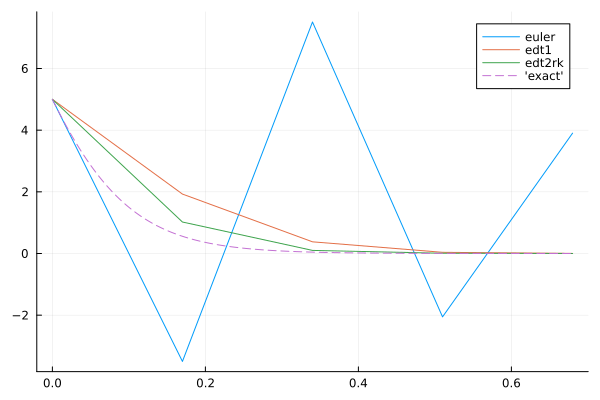

In [161]:
plot()
plot!(t, y1, label="euler")
plot!(t, y2, label="edt1")
plot!(t, y3, label="edt2rk")
plot!(te, ye, ls=:dash, label="'exact'")

In [ ]:
t